## Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from collections import defaultdict

In [2]:
#To display all columns in Jupyter Notebooks
pd.set_option('display.max_columns', 500)

## Retrieve data from Database

In [3]:
#Import MongoClient
from pymongo import MongoClient

#Create a MongoClient to run the MongoDB instance
client = MongoClient('localhost', 27017)

In [4]:
#Connect to existing datbase
db = client.NHANES_Q2

In [5]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'NHANES_Q2')

In [6]:
#Look at existing collections
col = db.list_collection_names()
col.sort()
col

['CA', 'CA_no_ohe', 'CL', 'CL_no_ohe', 'DI', 'DI_no_ohe', 'HD', 'HD_no_ohe']

In [7]:
#Collections
di = db.DI
di_no = db.DI_no_ohe

In [8]:
#Create dataframes from database collections
df_di = pd.DataFrame(list(di.find()))
df_di_no = pd.DataFrame(list(di_no.find()))

In [9]:
#Variable Declarations
df = df_di.copy()
df_no = df_di_no.copy()
label = 'DIQ010'
labeldescr = 'Diabetes (0-No, 1-Yes)'

## Reorder columns

### Reorder OHE dataframe

In [10]:
#Get a list of columns
cols = list(df)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index(label)))

In [11]:
#Reorder dataframe
df = df.loc[:, cols]
df.head()

,_id,ALQ101_2_0,BMXBMI,BPQ020_2_0,BPXDI1,BPXPULS_2_0,BPXSY1,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ050,HUQ070_2_0,INDFMINC,LBDHDL,LBDLDL,LBXTC,LBXTR,PAQ635_2_0,PAQ650_2_0,PAQ665_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMAQUEX_2_0,SMD410_2_0,SMQ680_2_0,Year,MEC18YR,DRX18YR,DIQ010
0,2.0,0,24.90,1,58.0,0,106.0,0,0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,0,2.0,1,0,0,0,3.0,0,8.0,54.0,136.0,215.0,128.0,1,1,1,0,77.0,0,1,0,0,1,1,1,0,3408.044382,3315.985398,0
1,5.0,0,29.10,0,82.0,0,122.0,0,0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,0,2.0,0,1,0,0,3.0,1,11.0,42.0,168.0,279.0,347.0,1,0,0,0,49.0,0,1,0,0,1,1,0,0,10219.103963,13105.246918,0
2,12.0,0,30.62,0,108.0,0,182.0,0,0,4.0,2.0,3.304000e+03,7511.18,5.397605e-79,3.090200e+02,1292.81,309.57,1242.06,1.70,18.68,23.31,3348.31,435.55,2364.22,4607.26,130.02,178.85,923.80,2.43,8.36,3.31,2.40,70.96,17.47,0,4.0,0,1,0,0,2.0,1,11.0,38.0,89.0,156.0,146.0,1,1,0,0,37.0,0,1,0,0,1,1,1,0,10149.365568,13280.150390,0
3,15.0,0,26.68,1,68.0,0,106.0,0,0,2.0,5.0,2.478000e+03,3832.49,1.315000e+01,4.328500e+02,814.59,264.69,596.30,1.40,16.15,16.14,2573.14,266.80,1321.30,3171.15,82.66,127.03,720.50,1.38,4.64,1.79,1.72,36.11,11.77,0,3.0,0,1,0,0,3.0,1,8.0,58.0,131.0,199.0,54.0,0,0,0,1,38.0,0,1,0,0,1,0,0,0,11437.714415,18684.987158,0
4,20.0,0,23.68,1,56.0,0,102.0,0,0,2.0,2.0,8.112500e+02,2746.43,5.397605e-79,3.720000e+01,779.50,205.70,527.91,0.79,13.17,29.66,1668.78,261.34,1389.30,1944.73,97.82,51.24,770.85,2.67,9.76,3.66,3.90,32.13,23.97,1,1.0,0,1,1,0,2.0,1,6.0,43.0,79.0,145.0,117.0,1,1,0,1,23.0,0,0,0,0,1,1,0,0,2206.039454,2414.789064,0


### Reorder non-OHE dataframe

In [12]:
#Get a list of columns
cols = list(df_no)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index(label)))

In [13]:
#Reorder dataframe
df_no = df_no.loc[:, cols]
df_no.head()

,_id,ALQ101,BMXBMI,BPQ020,BPXDI1,BPXPULS,BPXSY1,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010,HUQ010,HUQ020,HUQ030,HUQ050,HUQ070,INDFMINC,LBDHDL,LBDLDL,LBXTC,LBXTR,PAQ635,PAQ650,PAQ665,RIAGENDR,RIDAGEYR,RIDRETH1,SMAQUEX,SMD410,SMQ680,Year,MEC18YR,DRX18YR,DIQ010
0,2.0,1.0,24.90,2.0,58.0,1.0,106.0,1.0,1.0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,1.0,2.0,2.0,1.0,3.0,1.0,8.0,54.0,136.0,215.0,128.0,2.0,2.0,2.0,1.0,77.0,3.0,2.0,2.0,2.0,0,3408.044382,3315.985398,0
1,5.0,1.0,29.10,1.0,82.0,1.0,122.0,1.0,1.0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,1.0,2.0,3.0,1.0,3.0,2.0,11.0,42.0,168.0,279.0,347.0,2.0,1.0,1.0,1.0,49.0,3.0,2.0,2.0,1.0,0,10219.103963,13105.246918,0
2,12.0,1.0,30.62,1.0,108.0,1.0,182.0,1.0,1.0,4.0,2.0,3.304000e+03,7511.18,5.397605e-79,3.090200e+02,1292.81,309.57,1242.06,1.70,18.68,23.31,3348.31,435.55,2364.22,4607.26,130.02,178.85,923.80,2.43,8.36,3.31,2.40,70.96,17.47,1.0,4.0,3.0,1.0,2.0,2.0,11.0,38.0,89.0,156.0,146.0,2.0,2.0,1.0,1.0,37.0,3.0,2.0,2.0,2.0,0,10149.365568,13280.150390,0
3,15.0,1.0,26.68,2.0,68.0,1.0,106.0,1.0,1.0,2.0,5.0,2.478000e+03,3832.49,1.315000e+01,4.328500e+02,814.59,264.69,596.30,1.40,16.15,16.14,2573.14,266.80,1321.30,3171.15,82.66,127.03,720.50,1.38,4.64,1.79,1.72,36.11,11.77,1.0,3.0,3.0,1.0,3.0,2.0,8.0,58.0,131.0,199.0,54.0,1.0,1.0,1.0,2.0,38.0,3.0,2.0,1.0,1.0,0,11437.714415,18684.987158,0
4,20.0,1.0,23.68,2.0,56.0,1.0,102.0,1.0,1.0,2.0,2.0,8.112500e+02,2746.43,5.397605e-79,3.720000e+01,779.50,205.70,527.91,0.79,13.17,29.66,1668.78,261.34,1389.30,1944.73,97.82,51.24,770.85,2.67,9.76,3.66,3.90,32.13,23.97,2.0,1.0,3.0,2.0,2.0,2.0,6.0,43.0,79.0,145.0,117.0,2.0,2.0,1.0,2.0,23.0,1.0,2.0,2.0,1.0,0,2206.039454,2414.789064,0


# Exploratory Data Analysis

### Analysis of Data

In [14]:
import seaborn as sns

In [15]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15105 entries, 0 to 15104
Data columns (total 58 columns):
_id         15105 non-null float64
ALQ101      15105 non-null float64
BMXBMI      15105 non-null float64
BPQ020      15105 non-null float64
BPXDI1      15105 non-null float64
BPXPULS     15105 non-null float64
BPXSY1      15105 non-null float64
DMDBORN4    15105 non-null float64
DMDCITZN    15105 non-null float64
DMDHHSIZ    15105 non-null float64
DMDHREDU    15105 non-null float64
DRD320GW    15105 non-null float64
DRDTSODI    15105 non-null float64
DRXTALCO    15105 non-null float64
DRXTCAFF    15105 non-null float64
DRXTCALC    15105 non-null float64
DRXTCARB    15105 non-null float64
DRXTCHOL    15105 non-null float64
DRXTCOPP    15105 non-null float64
DRXTFIBE    15105 non-null float64
DRXTIRON    15105 non-null float64
DRXTKCAL    15105 non-null float64
DRXTMAGN    15105 non-null float64
DRXTPHOS    15105 non-null float64
DRXTPOTA    15105 non-null float64
DRXTPROT    1510

### Define Categorical & Numerical Features

In [16]:
#Change columns to category
#Columns to remove: 
#DRX18YR - 18 Year weight
#MEC18YR - 18 year Weight
#Year - Year of observation
#_id - Unique ID to identify individual

cat_cols = ['DMDBORN4',
            'DMDCITZN',
            'DMDHHSIZ',
            'DMDHREDU',
            'INDFMINC',
            'RIAGENDR',
            'RIDRETH1',
            'ALQ101',
            'DIQ010',
            'BPQ020',
            'BPXPULS',
            'PAQ635',
            'PAQ650',
            'PAQ665',
            'SMAQUEX',
            'SMQ680',
            'SMD410',
            'MCQ010',
            'MCQ160C',
            'MCQ220',
            'MCQ160K',
            'HID010',
            'HUQ010',
            'HUQ020',
            'HUQ030',
            'HUQ050',
            'HUQ070',
            'WHQ030',
            'WHQ040']

num_cols = ['RIDAGEYR',
            'DRD320GW',
             'DRDTSODI',
             'DRX18YR',
             'DRXTALCO',
             'DRXTCAFF',
             'DRXTCALC',
             'DRXTCARB',
             'DRXTCHOL',
             'DRXTCOPP',
             'DRXTFIBE',
             'DRXTIRON',
             'DRXTKCAL',
             'DRXTMAGN',
             'DRXTMFAT',
             'DRXTPFAT',
             'DRXTPHOS',
             'DRXTPOTA',
             'DRXTPROT',
             'DRXTSFAT',
             'DRXTTFAT',
             'DRXTVARE',
             'DRXTVB1',
             'DRXTVB12',
             'DRXTVB2',
             'DRXTVB6',
             'DRXTVC',
             'DRXTZINC',   
             'BPXDI1',
             'BPXSY1',
             'LBDHDL',
             'LBDHDLSI',
             'LBDLDL',
             'LBDLDLSI',
             'LBDTCSI',
             'LBDTRSI',
             'LBXTC',
             'LBXTR',
             'BMXBMI',
             'BMXHT',
             'BMXWAIST',
             'BMXWT'
]


def recat_cols(df, col_names):
    for x in col_names:
        if x in cat_cols:
            df[x] = df[x].astype('category')
    return df

col_names = df_no.columns
df_no = recat_cols(df_no, col_names)

In [17]:
#Recategorized columns
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15105 entries, 0 to 15104
Data columns (total 58 columns):
_id         15105 non-null float64
ALQ101      15105 non-null category
BMXBMI      15105 non-null float64
BPQ020      15105 non-null category
BPXDI1      15105 non-null float64
BPXPULS     15105 non-null category
BPXSY1      15105 non-null float64
DMDBORN4    15105 non-null category
DMDCITZN    15105 non-null category
DMDHHSIZ    15105 non-null category
DMDHREDU    15105 non-null category
DRD320GW    15105 non-null float64
DRDTSODI    15105 non-null float64
DRXTALCO    15105 non-null float64
DRXTCAFF    15105 non-null float64
DRXTCALC    15105 non-null float64
DRXTCARB    15105 non-null float64
DRXTCHOL    15105 non-null float64
DRXTCOPP    15105 non-null float64
DRXTFIBE    15105 non-null float64
DRXTIRON    15105 non-null float64
DRXTKCAL    15105 non-null float64
DRXTMAGN    15105 non-null float64
DRXTPHOS    15105 non-null float64
DRXTPOTA    15105 non-null float64
DRXTPROT 

## Plots of Features

### Categorical Features

In [18]:
#Get Categorical Features Only
df_cat = df_no.copy()
df_cat = df_cat.select_dtypes(include=['category'])
df_cat = df_cat.drop([label], axis=1)

In [19]:
df_cat.head()

,ALQ101,BPQ020,BPXPULS,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,HID010,HUQ010,HUQ020,HUQ030,HUQ050,HUQ070,INDFMINC,PAQ635,PAQ650,PAQ665,RIAGENDR,RIDRETH1,SMAQUEX,SMD410,SMQ680
0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,3.0,1.0,8.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,2.0,3.0,1.0,3.0,2.0,11.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0
2,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,11.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
3,1.0,2.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,3.0,1.0,3.0,2.0,8.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0
4,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0


In [20]:
df_cat.shape

(15105, 22)

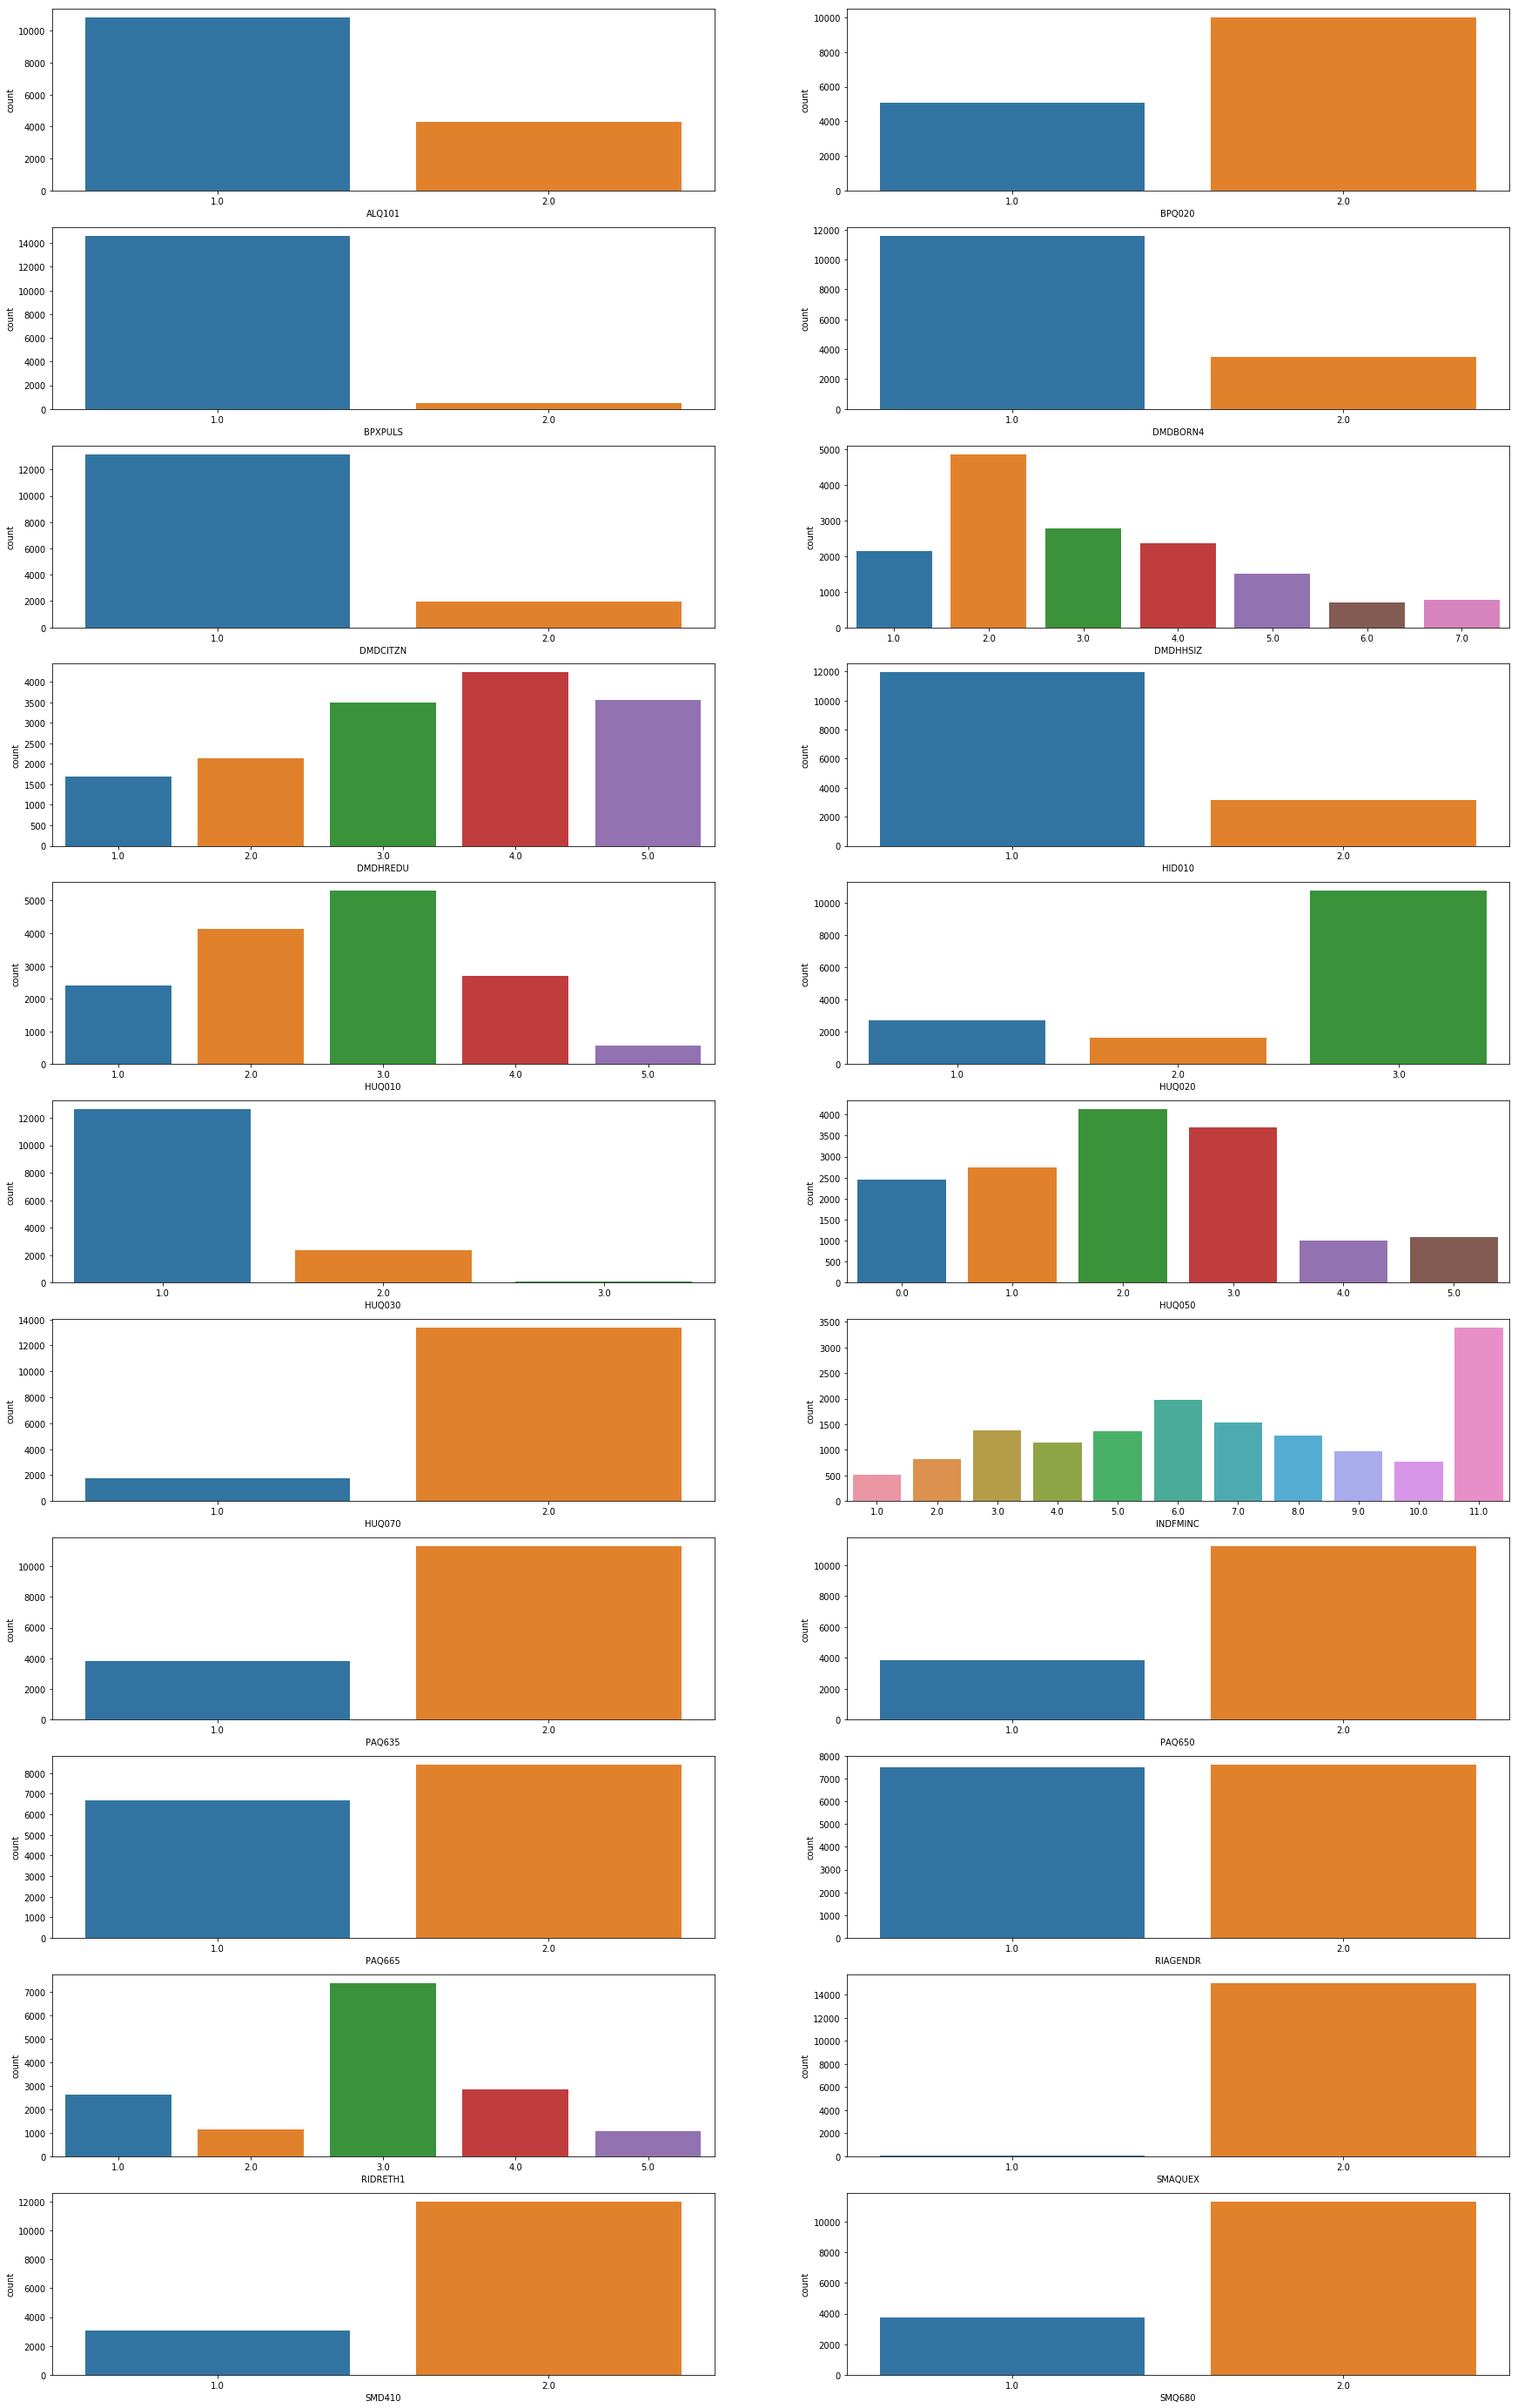

In [21]:
fig, ax = plt.subplots(11, 2, figsize=(30,50))
ax = ax.flatten()
for a, catplot in zip(ax, list(df_cat.columns)):
    sns.countplot(x=catplot, data=df_cat, ax=a)
plt.show()

### Numerical Features

In [22]:
#Get Numerical Features Only
df_num = df_no.copy()
df_num = df_num.select_dtypes(include=['float64'])
df_num = df_num.drop(['_id','MEC18YR','DRX18YR'], axis=1)

In [23]:
df_num.shape

(15105, 31)

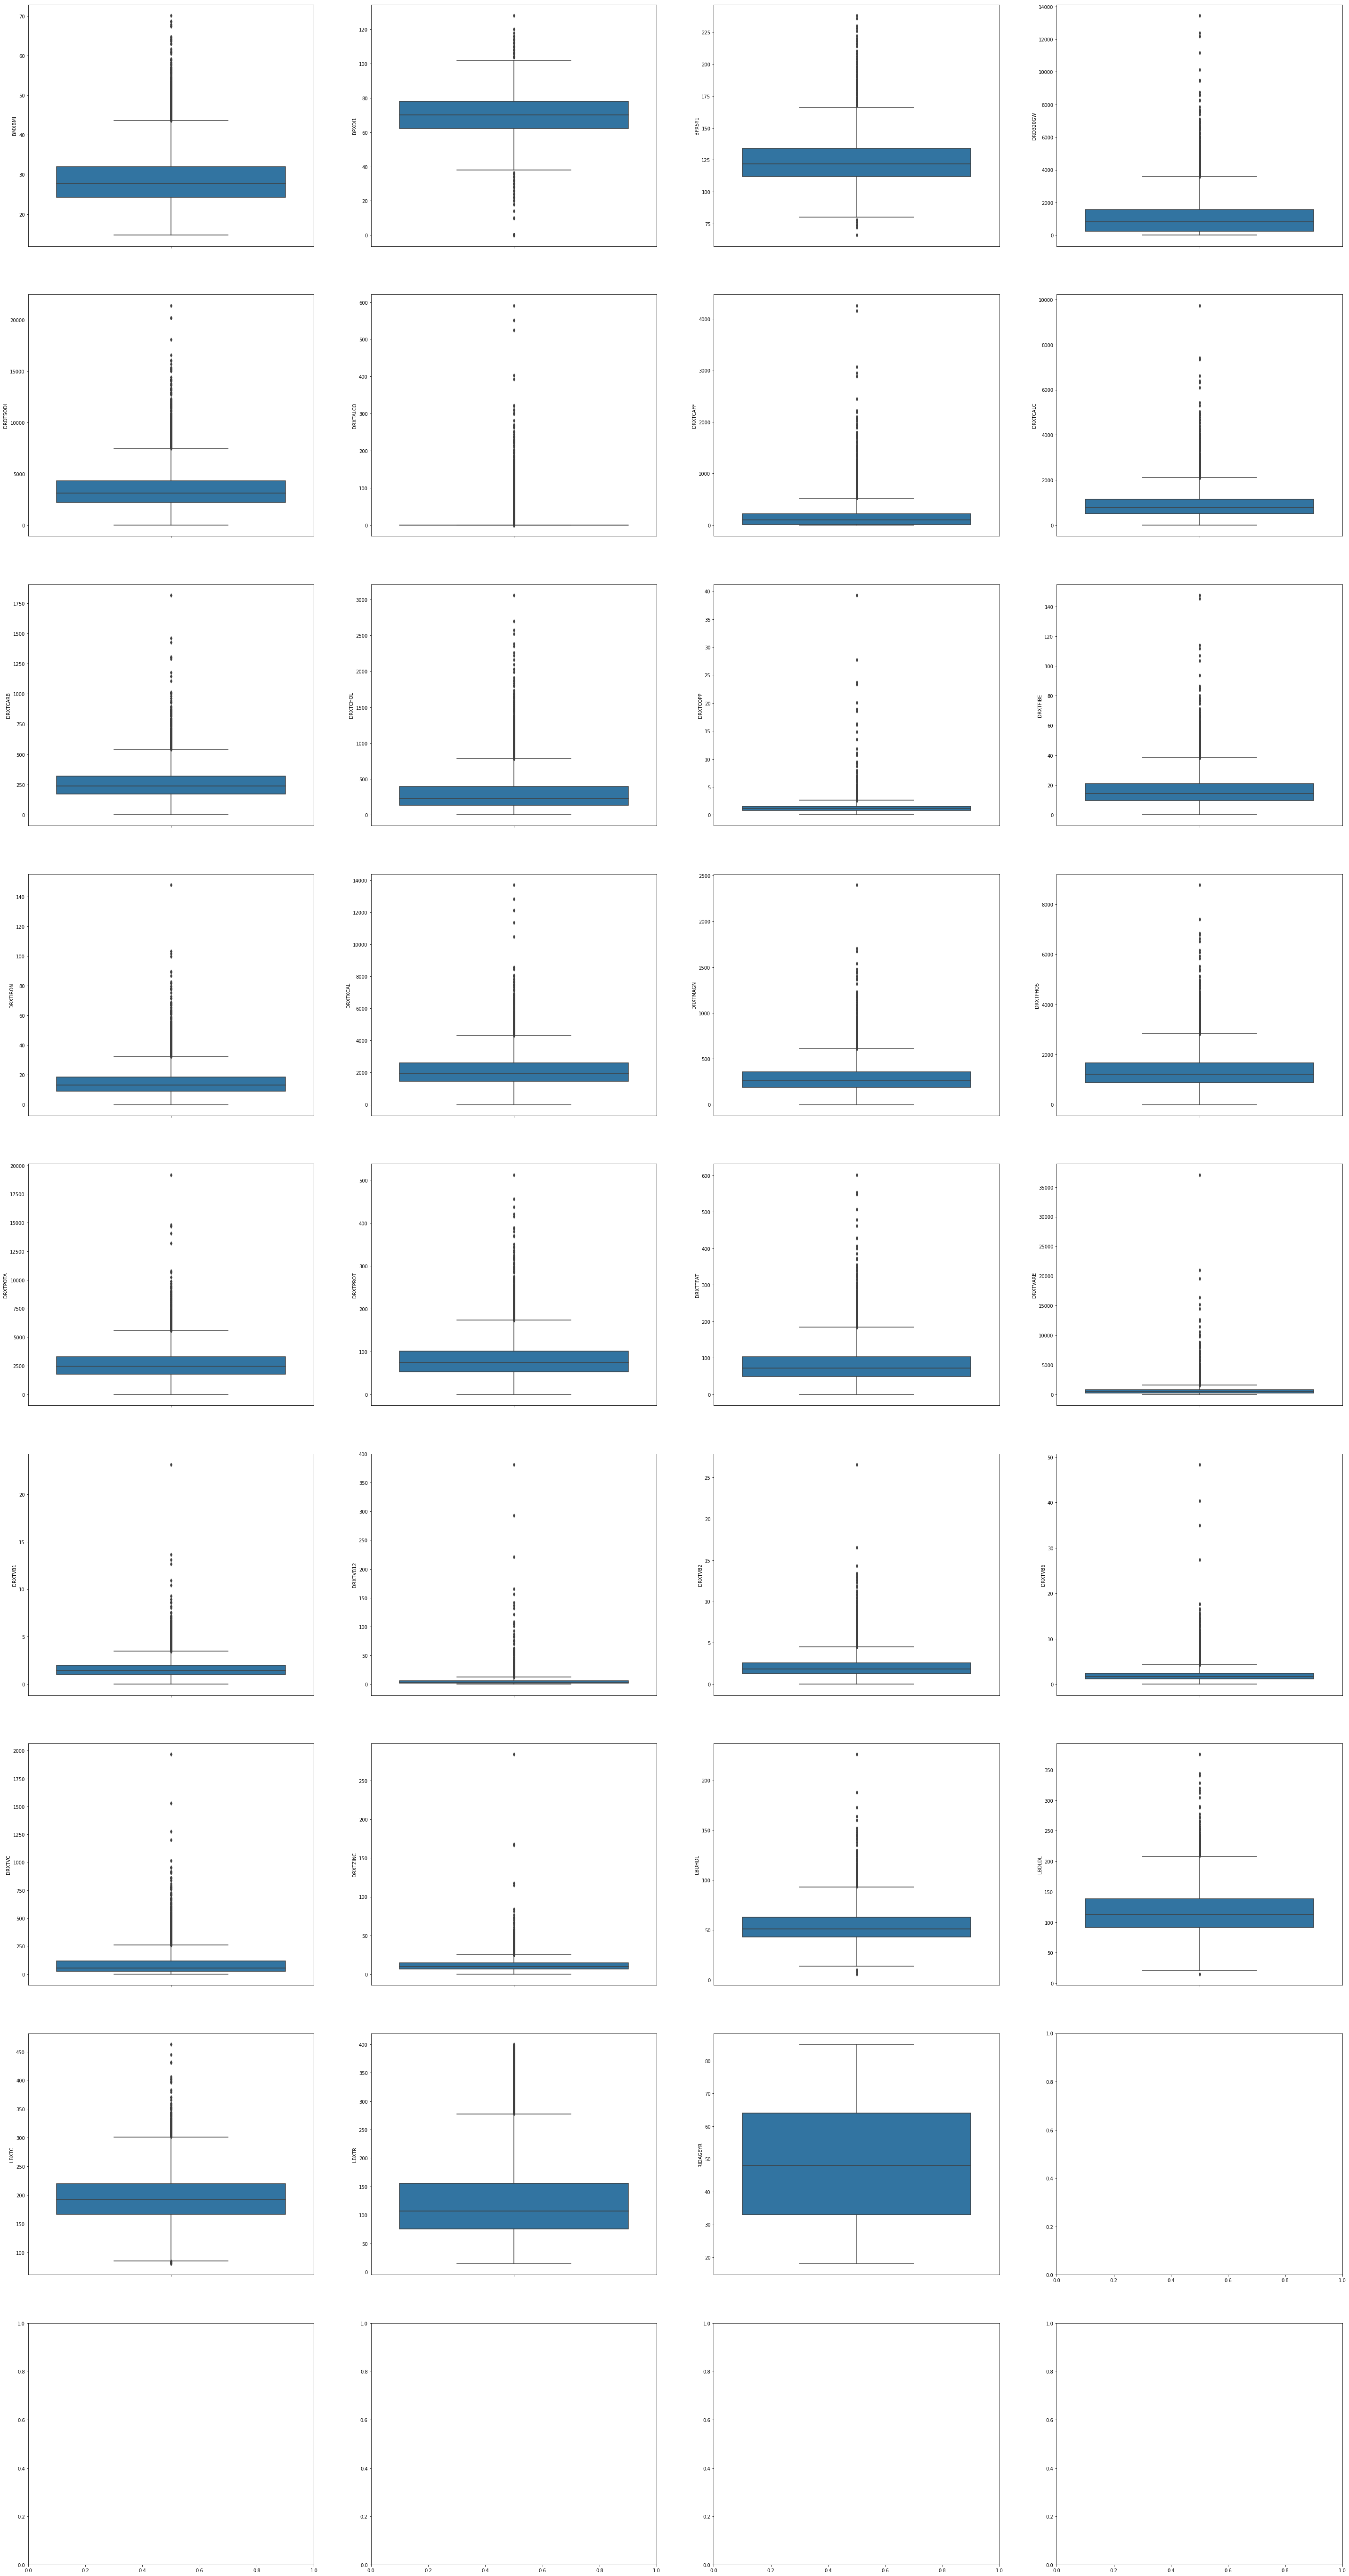

In [24]:
fig, ax = plt.subplots(9, 4, figsize=(50,100))
ax = ax.flatten()
for a, bp in zip(ax, list(df_num.columns)):
    sns.boxplot(y=bp, data=df_num, ax=a)
plt.show()

### Class Distribution

In [25]:
label_count = df_no.groupby(label, as_index = False).count()

In [26]:
#Count of class labels
class_names = list(label_count[label]) #Count the different labels
count = list(label_count['_id']) #Sum of different labels
count

[13231, 1874]

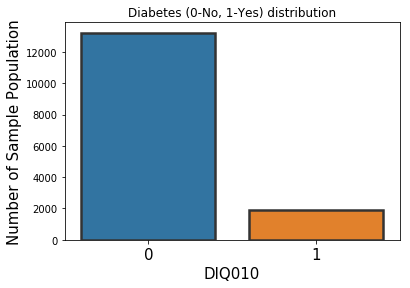

In [27]:
#Bar Plot of Class Labels
index = np.arange(len(class_names))
sns.barplot(x=class_names, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel(label, fontsize=15)
plt.ylabel('Number of Sample Population', fontsize=15)
plt.xticks(index, class_names, fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

In [28]:
#Find balance of labels
sum(df_no[label]==1)/(len(df_no[label]))
#0.87594 in majority class - No Diabetes
#0.12406 in minority class - Diabetes

0.12406487917907978

## Class distribution as percentage of years

In [29]:
label_perc = df_no.groupby(['Year',label], as_index = False).count()

In [30]:
lp = label_perc[['Year', '_id',label]].copy()

In [31]:
perc = lp.groupby(['Year', '_id']).agg({'_id': 'sum'})
perc = perc.rename(columns={ perc.columns[0]: "pcts" })
perc = perc.sort_values(by=['Year','pcts'], ascending=[True, False])
# Change: groupby Year and divide by sum
label_pcts = perc.groupby(level=0).apply(lambda x: x / float(x.sum()))

In [32]:
#Get percentage values
lp['Percentages'] = label_pcts.values

In [33]:
lp.head()

,Year,_id,DIQ010,Percentages
0,0,1178,0,0.937152
1,0,79,1,0.062848
2,1,1438,0,0.914758
3,1,134,1,0.085242
4,2,1255,0,0.883803


In [34]:
year_names = list(lp['Year'])
class_names = list(lp[label])

In [35]:
perc = list(lp['Percentages'])

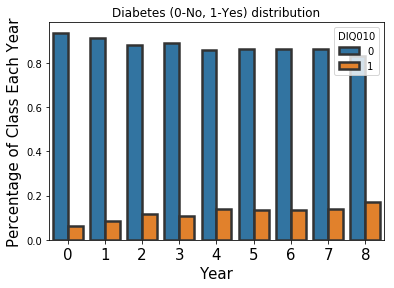

In [36]:
sns.barplot(x='Year', y='Percentages', data=lp, hue=label, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Percentage of Class Each Year', fontsize=15)
plt.xticks(fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

## Correlation of Numerical Features

### Pearson's Coefficient

#### Correlation of Numerical features

In [37]:
df_no.shape

(15105, 58)

In [38]:
#get Correlations of each features in dataset
x = ['_id', 'Year', 'MEC18YR', 'DRX18YR']

corrmat = df_no[df_no.columns.difference(x)].corr()
top_corr_features = corrmat.index

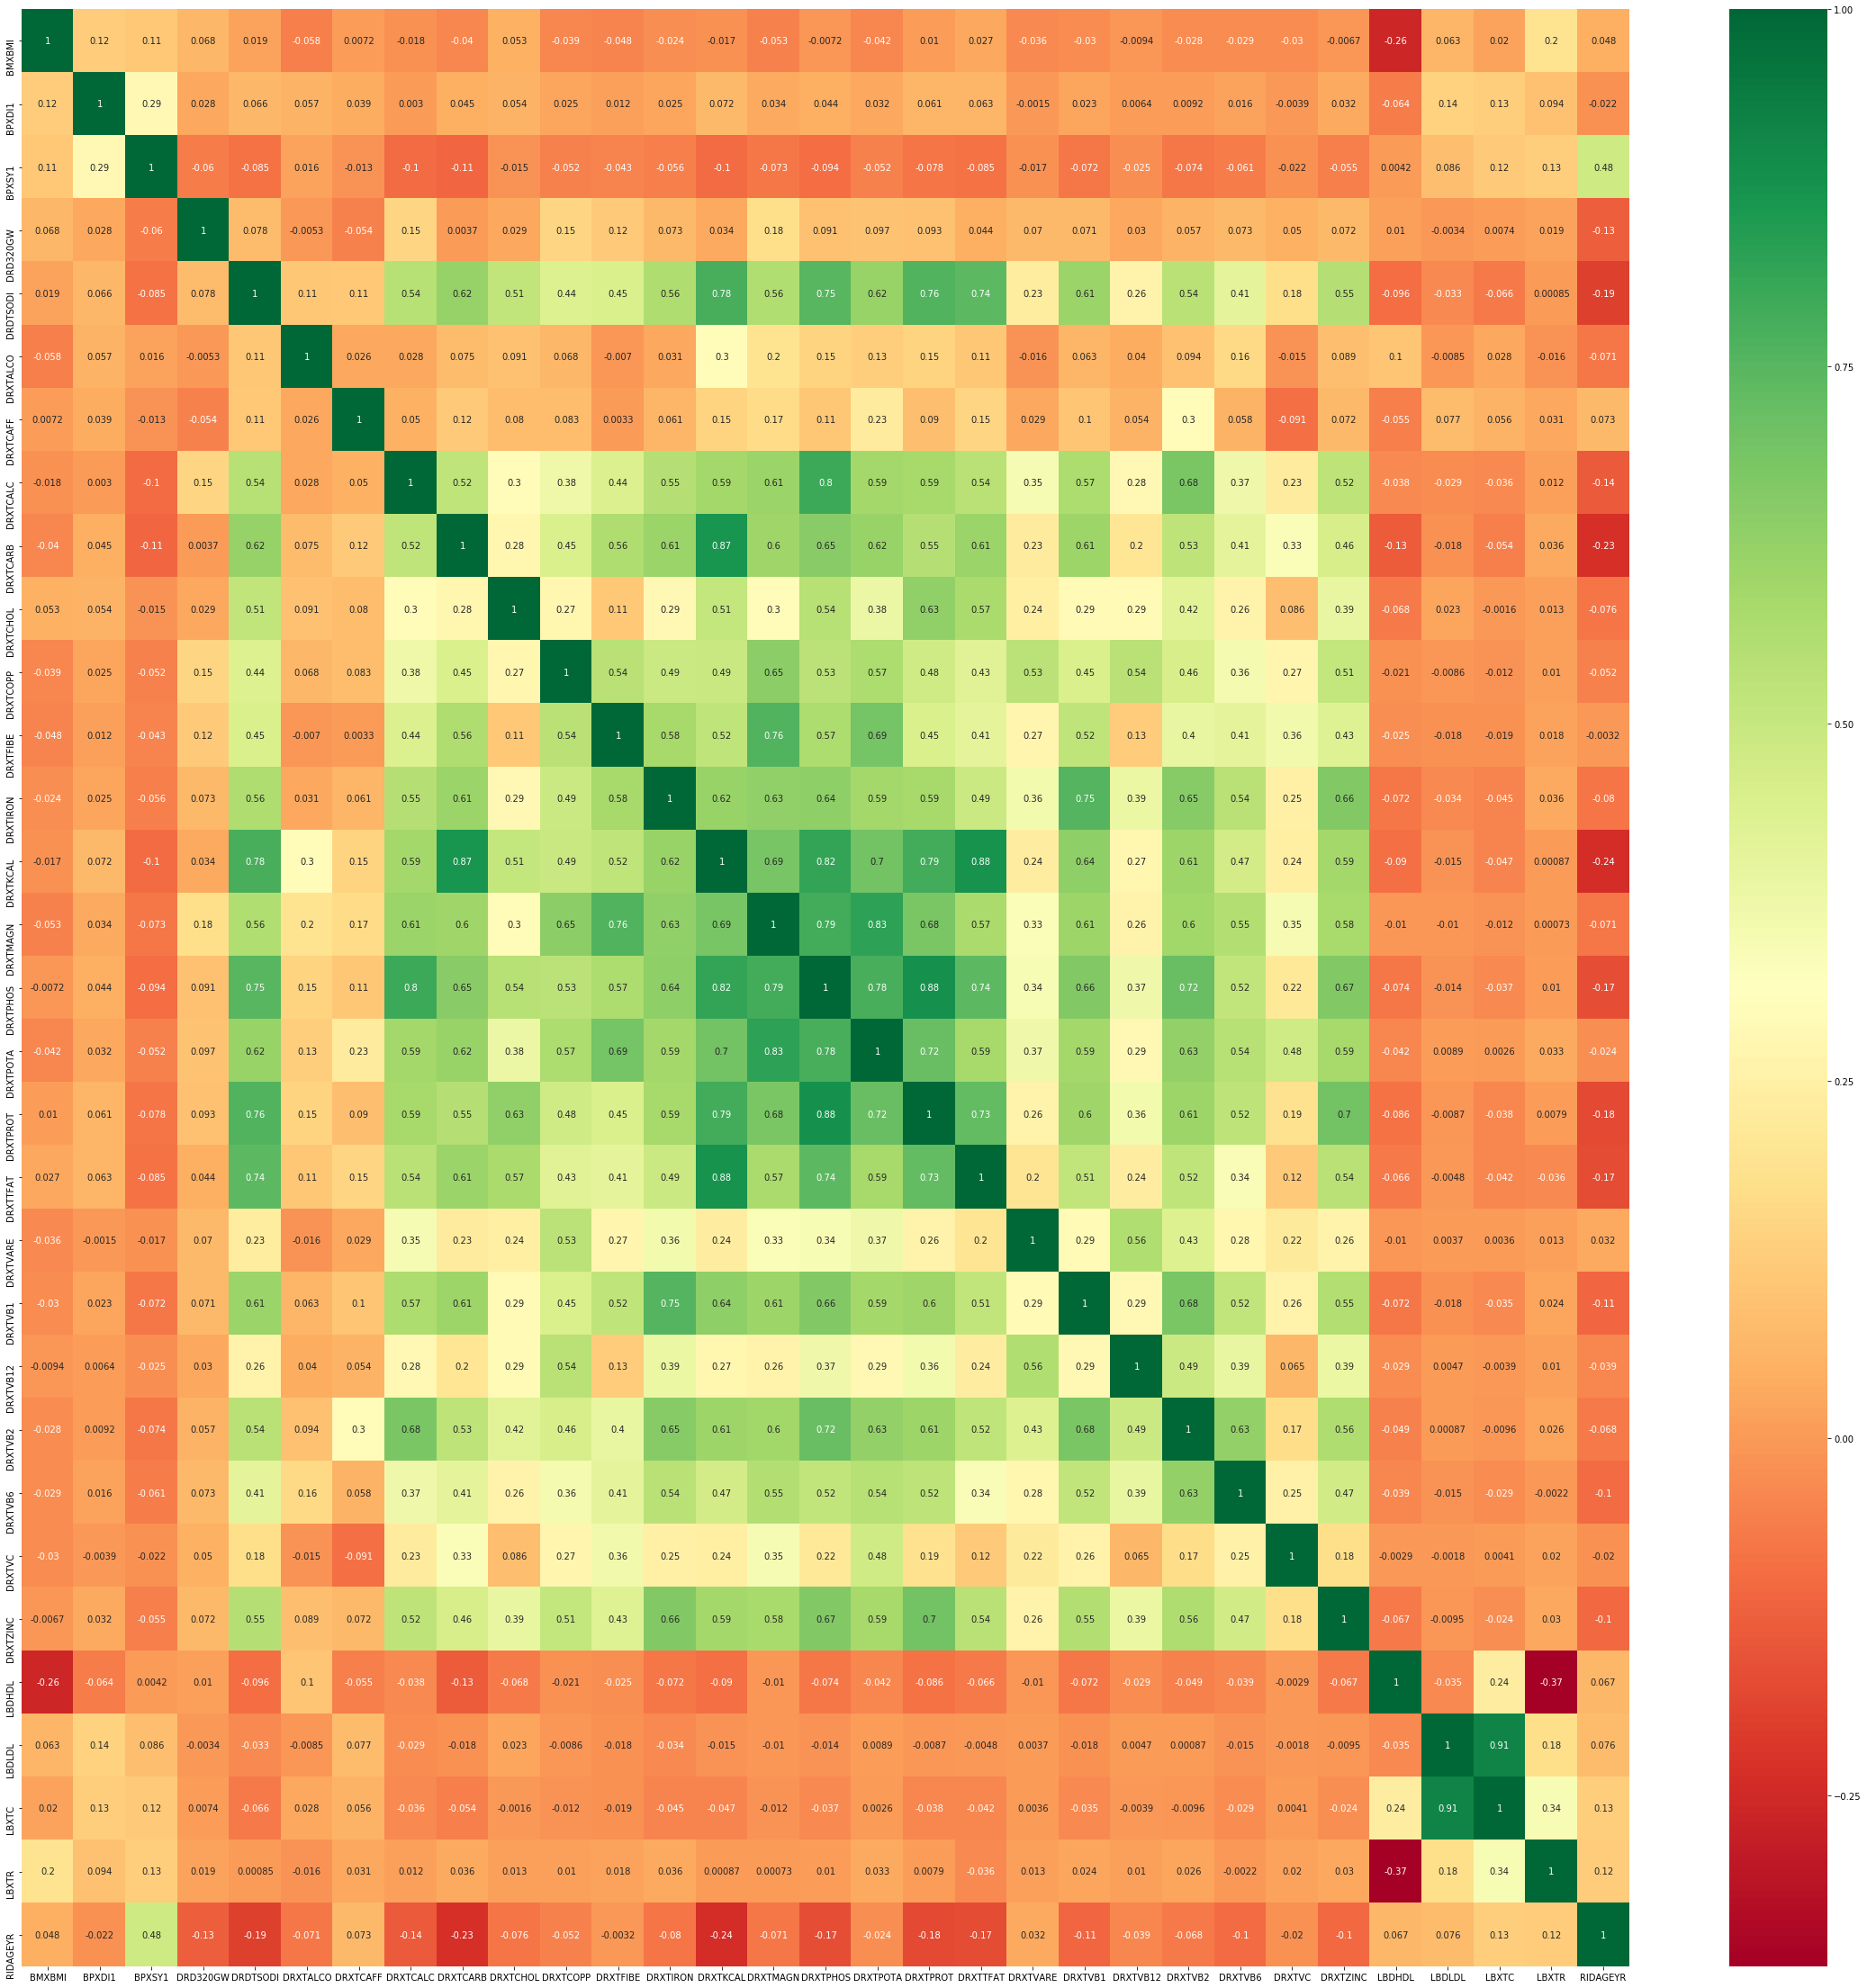

In [39]:
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [40]:
#cor_target = abs(corrmat[label])
#relevant_features = cor_target[cor_target>0.1]
#relevant_features

# Create X and y

In [41]:
#Drop variables
#Create X - drop id, label, and sample weight
X = df.drop(['_id', label], axis=1)

#Maintain id of X's
X_idx = df[['_id']]

#Create y - label
y = df[[label]]

#Create column to stratify based on year
year = df[['Year']]

In [42]:
X.shape

(15105, 61)

# Split Train, Test

In [43]:
#Train, test, split
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
#Stratify Train, Test based on Year Value
#80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=year)

In [45]:
#y_true is test label
y_true = y_test[label]

In [46]:
df['Year'].value_counts()

5    1995
4    1945
7    1909
6    1719
8    1702
3    1586
1    1572
2    1420
0    1257
Name: Year, dtype: int64

## Check if Stratified Sampling Worked

In [47]:
#See if years are split evenly in training and test
xt = X_train['Year'].value_counts()
xte = X_test['Year'].value_counts()

In [48]:
#Test is 20% of Training for each year
xte/(xte+xt)

5    0.200000
4    0.200000
7    0.200105
6    0.200116
8    0.200353
3    0.199874
1    0.199746
2    0.200000
0    0.199682
Name: Year, dtype: float64

In [49]:
#Test set label distribution
yt = y_true.value_counts()
yt

0    2630
1     391
Name: DIQ010, dtype: int64

In [50]:
yt[0]/(yt[0]+yt[1])

0.870572658060245

In [51]:
#Train set label distribution
ytr = y_train[label].value_counts()
ytr

0    10601
1     1483
Name: DIQ010, dtype: int64

In [52]:
ytr[0]/(ytr[0]+ytr[1])

0.877275736511089

# Resample: Upsample and Downsample (Not Used)

We have imbalanced data, so we want to do upsampling and downsampling to see if it will improve the model

In [53]:
from sklearn.utils import resample

In [54]:
#Resample training data function
def resample_train(X_train, y_train, sample_type, label):
    #Concatenate our training data back together
    X_r = pd.concat([X_train, y_train], axis=1)
    
    #Separate minority and majority classes
    minority = X_r[X_r[label]==1]
    majority = X_r[X_r[label]==0]
    
    if (sample_type=='up'):
        #Upsample minority class
        resampled = resample(minority,
                           replace=True, #Sample with replacement
                           n_samples=len(majority), #Match number in majority class
                           random_state=0) #Reproducible results
        notsampled=majority
    
    if (sample_type=='down'):
        #Downsample majority class
        resampled = resample(majority,
                           replace=False, #Sample without replacement
                           n_samples=len(minority), #Match minority n
                           random_state=0) #Reproducible results
        notsampled=minority
    
    #Combine upsample or downsample of majority and minority
    sampled = pd.concat([resampled, notsampled])
    y_train = sampled[[label]]
    X_train = sampled.drop([label], axis=1)
    return X_train, y_train    

#### Sklearn Upsampled

In [55]:
X_train_u, y_train_u = resample_train(X_train, y_train, 'up', label)

In [56]:
y_train_u[y_train_u[label]==1].shape

(10601, 1)

In [57]:
y_train_u[y_train_u[label]==0].shape

(10601, 1)

#### Sklearn Downsampled

In [58]:
X_train_d, y_train_d = resample_train(X_train, y_train, 'down', label)

In [59]:
y_train_d[y_train_d[label]==1].shape

(1483, 1)

In [60]:
y_train_d[y_train_d[label]==0].shape

(1483, 1)

# Imbalance Learn - SMOTE (Up) and TomekLinks (Down)

### Upsampling - SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state=1)

In [63]:
X_sm, y_sm = sm.fit_sample(X_train, y_train.values.ravel())

In [64]:
#Before upsampling - Majority
len(y_train[y_train[label]==0])

10601

In [65]:
#Before upsampling - Minority
len(y_train[y_train[label]==1])

1483

In [66]:
#After upsampling, majority and minority match
sum(y_sm==0)

10601

In [67]:
sum(y_sm==1)

10601

### Downsampling - Tomeklinks

In [68]:
from imblearn.under_sampling import TomekLinks

In [69]:
tLinks = TomekLinks(random_state = 0, return_indices = True)

In [70]:
X_tl, y_tl, id_tl = tLinks.fit_sample(X_train, y_train.values.ravel())

In [71]:
#Before downsampling - Majority
len(y_train[y_train[label]==0])

10601

In [72]:
#Before downsampling - Minority
len(y_train[y_train[label]==1])

1483

In [73]:
#After downsampling, majority decreases in neighbors
sum(y_tl==0)

10121

In [74]:
sum(y_tl==1)

1483

# Clean Columns for Training Data

## Regular Training and Test

In [75]:
X_cols = list(X_train.columns)

#Get MEC18YR from training & test data
Xtr_sw = X_train[['MEC18YR']]
Xts_sw = X_test[['MEC18YR']]

#Get DRX18YR from training & test data
Xtr_dsw = X_train[['DRX18YR']]
Xts_dsw = X_test[['DRX18YR']]

#Get Year from training & test data
Xtr_yr = X_train[['Year']]
Xts_yr = X_test[['Year']]

#Drop columns for training
X_train = X_train.drop(['MEC18YR','DRX18YR','Year'], axis=1)
X_test = X_test.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## SMOTE

In [76]:
X_sm = pd.DataFrame(X_sm, columns = X_cols)

In [77]:
X_sm.head()

,ALQ101_2_0,BMXBMI,BPQ020_2_0,BPXDI1,BPXPULS_2_0,BPXSY1,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ050,HUQ070_2_0,INDFMINC,LBDHDL,LBDLDL,LBXTC,LBXTR,PAQ635_2_0,PAQ650_2_0,PAQ665_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMAQUEX_2_0,SMD410_2_0,SMQ680_2_0,Year,MEC18YR,DRX18YR
0,1.0,21.08,0.0,90.0,1.0,132.0,1.0,1.0,7.0,1.0,29.60,727.0,4.100000e+00,390.0,97.0,37.35,76.0,0.149,1.0,2.57,468.0,69.0,311.0,968.0,31.84,21.47,27.0,0.245,0.50,0.809,0.602,1.9,1.64,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,87.0,141.0,239.0,54.0,0.0,0.0,1.0,1.0,47.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3276.662778,2244.348303
1,0.0,36.10,1.0,70.0,0.0,116.0,0.0,0.0,5.0,4.0,1740.00,6711.0,5.397605e-79,144.0,1367.0,385.97,169.0,1.885,42.5,26.71,2953.0,394.0,1834.0,3036.0,107.19,111.20,773.0,3.351,6.04,2.535,2.299,13.3,14.85,0.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,10.0,37.0,130.0,207.0,199.0,1.0,1.0,0.0,0.0,42.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,7.0,12494.141697,9970.381123
2,0.0,52.94,1.0,74.0,0.0,150.0,0.0,0.0,3.0,2.0,1066.51,1968.0,2.230000e+01,2.0,419.0,132.87,401.0,0.723,5.4,7.65,1370.0,134.0,671.0,909.0,40.42,58.13,307.0,0.964,1.85,1.296,0.639,0.2,3.93,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,8.0,43.0,96.0,153.0,71.0,1.0,1.0,1.0,0.0,53.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,2992.452698,2605.664627
3,0.0,27.47,0.0,58.0,1.0,132.0,0.0,0.0,2.0,1.0,463.73,1437.0,5.397605e-79,54.0,206.0,161.85,160.0,0.564,6.9,9.63,1480.0,104.0,640.0,1440.0,57.82,66.67,13.0,0.660,4.96,0.747,1.208,7.5,12.22,0.0,4.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,47.0,158.0,228.0,117.0,0.0,1.0,1.0,0.0,72.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,349.284857,469.158544
4,0.0,32.50,0.0,66.0,1.0,106.0,0.0,0.0,4.0,3.0,355.00,2581.0,5.397605e-79,35.0,670.0,231.53,139.0,0.855,13.2,12.35,1539.0,227.0,890.0,1515.0,62.58,40.65,22.0,1.639,2.41,1.158,1.045,109.8,8.53,0.0,3.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,46.0,73.0,174.0,276.0,0.0,1.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,6.0,3098.434269,3754.497623


In [78]:
#Get MEC18YR from training
Xsm_sw = X_sm[['MEC18YR']]

#Get DRX18YR from training
Xsm_dsw = X_sm[['DRX18YR']]

#Get Year from training
Xsm_yr = X_sm[['Year']]

#Drop columns for training
X_sm = X_sm.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## TomekLinks

In [79]:
X_tl = pd.DataFrame(X_tl, columns = X_cols)

In [80]:
#Get MEC18YR from training
Xtl_sw = X_tl[['MEC18YR']]

#Get DRX18YR from training
Xtl_dsw = X_tl[['DRX18YR']]

#Get Year from training
Xtl_yr = X_tl[['Year']]

#Drop sample weight
X_tl = X_tl.drop(['MEC18YR','DRX18YR','Year'], axis=1)

# Feature Selection

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Drop MEC sample weight for X for feature selection

In [82]:
Xd = df_no.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df_no[label]

### Feature Selection

In [83]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
20  DRXTKCAL  61935.278431
23  DRXTPOTA  14539.333084
14  DRXTCALC  13188.539416
11  DRDTSODI  11696.630972
15  DRXTCARB  11673.641522
22  DRXTPHOS  11420.004591
48  RIDAGEYR   6904.187449
43     LBXTR   6743.751639
26  DRXTVARE   4831.146820
12  DRXTALCO   4325.718920


### OHE Feature Selection

In [84]:
Xd = df.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df[label]

In [85]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
20  DRXTKCAL  61935.278431
23  DRXTPOTA  14539.333084
14  DRXTCALC  13188.539416
11  DRDTSODI  11696.630972
15  DRXTCARB  11673.641522
22  DRXTPHOS  11420.004591
50  RIDAGEYR   6904.187449
45     LBXTR   6743.751639
26  DRXTVARE   4831.146820
12  DRXTALCO   4325.718920


# Data Analysis: Random Forest and XGBoost

### Import Machine Learning Libraries

In [86]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import plot_importance

#Grid Search
from sklearn.model_selection import GridSearchCV

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import mean_squared_error, classification_report, f1_score

# Random Forest

## GridSearch: Define parameters and run

### Regular Training

In [87]:
#clf = RandomForestClassifier(random_state=1)

#Define Parameter Grid for GridSearchCV
# param_grid = {
#     'n_estimators' : [200],
#     'max_features' : ['auto'],
#     'max_depth' : [4, 6, 8, 15],
#     'criterion' : ['gini'],
#     'class_weight' : [{0:0.1, 1:0.9},'balanced']
# }

In [88]:
#cv_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [89]:
#cv_rfc.fit(X_train, y_train.values.ravel())

In [90]:
#cv_rfc.best_params_
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'n_estimators': 200}

In [91]:
#cv_rfc.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
#             criterion='gini', max_depth=6, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [92]:
#cv_rfc.best_score_
#0.46175239302855975

### Upsampling: SMOTE

In [93]:
#clf_u = RandomForestClassifier(random_state=1)

In [94]:
#cv_rfc_u = GridSearchCV(estimator=clf_u, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [95]:
#cv_rfc_u.fit(X_sm, y_sm)

In [96]:
#cv_rfc_u.best_params_
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_depth': 15,
#  'max_features': 'auto',
#  'n_estimators': 200}

In [97]:
#cv_rfc_u.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight='balanced',
#             criterion='gini', max_depth=15, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [98]:
#cv_rfc_u.best_score_
#0.9025614637840615

### Downsampling: TomekLinks

In [99]:
#clf_d = RandomForestClassifier(random_state=1)

In [100]:
#cv_rfc_d = GridSearchCV(estimator= clf_d, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [101]:
#cv_rfc_d.fit(X_tl, y_tl)

In [102]:
#cv_rfc_d.best_params_
# {'class_weight': 'balanced',
#  'criterion': 'gini',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'n_estimators': 200}

In [103]:
#cv_rfc_d.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight='balanced',
#             criterion='gini', max_depth=8, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
#             verbose=0, warm_start=False)

In [104]:
#cv_rfc_d.best_score_
#0.4753574582260989

## Define Classifier with Best Parameters and Fit

### Regular Training

In [105]:
clf_r = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [106]:
clf_r.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Upsampling: SMOTE

In [107]:
clf_s = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [108]:
clf_s.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Downsampling: TomekLinks

In [109]:
clf_t = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [110]:
clf_t.fit(X_tl, y_tl)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

## Feature Importance from Random Forest

### Regular Training

In [111]:
rf_output = pd.DataFrame(clf_r.feature_importances_) #Get importance of features in order
rf_output['Label'] = X_train.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [112]:
rf_oo_r = rf_output.nlargest(10, 'Feature_Importance')

In [113]:
rf_oo_r_s = rf_oo_r.sort_values(by=['Feature_Importance'])

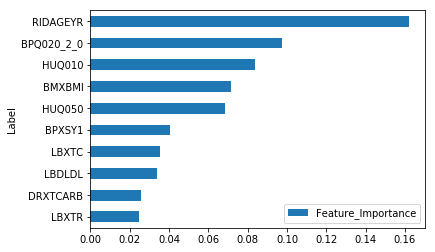

In [114]:
ax_r = rf_oo_r_s.plot.barh(y='Feature_Importance', x='Label')

### Upsampling: SMOTE

In [115]:
rf_output = pd.DataFrame(clf_s.feature_importances_)
rf_output['Label'] = X_sm.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [116]:
rf_oo_u = rf_output.nlargest(10, 'Feature_Importance')

In [117]:
rf_oo_u_s = rf_oo_u.sort_values(by=['Feature_Importance'])

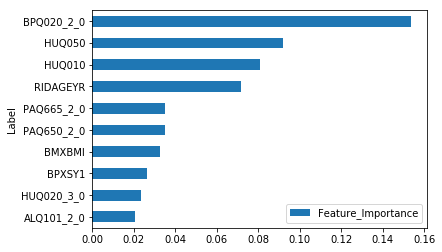

In [118]:
ax_u = rf_oo_u_s.plot.barh(y='Feature_Importance', x='Label')

### Downsampling: TomekLinks

In [119]:
rf_output = pd.DataFrame(clf_t.feature_importances_)
rf_output['Label'] = X_tl.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [120]:
rf_oo_d = rf_output.nlargest(10, 'Feature_Importance')

In [121]:
rf_oo_d_s = rf_oo_d.sort_values(by=['Feature_Importance'])

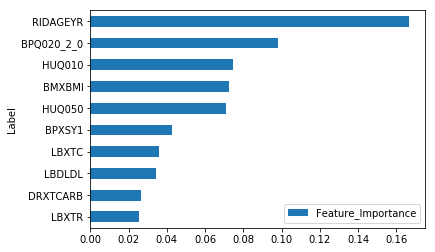

In [122]:
ax_d = rf_oo_d_s.plot.barh(y='Feature_Importance', x='Label')

# Model Evaluation

## Confusion Matrix & Classification Reports

### Regular Training

In [123]:
pred_r = clf_r.predict(X_test)

In [124]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_r, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2169,461,2630
1,129,262,391
All,2298,723,3021


In [125]:
r_output = '{} \n Accuracy: {}'
r = r_output.format(classification_report(y_true, pred_r, labels=[0,1]), accuracy_score(y_true, pred_r))
print(r)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2630
           1       0.36      0.67      0.47       391

   micro avg       0.80      0.80      0.80      3021
   macro avg       0.65      0.75      0.68      3021
weighted avg       0.87      0.80      0.83      3021
 
 Accuracy: 0.8047004303210857


### Upsampling: SMOTE

In [126]:
pred_s = clf_s.predict(X_test)

In [127]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_s, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2518,112,2630
1,286,105,391
All,2804,217,3021


In [128]:
u_output = '{} \n Accuracy: {}'
u = u_output.format(classification_report(y_true, pred_s, labels=[0,1]), accuracy_score(y_true, pred_s))
print(u)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2630
           1       0.48      0.27      0.35       391

   micro avg       0.87      0.87      0.87      3021
   macro avg       0.69      0.61      0.64      3021
weighted avg       0.84      0.87      0.85      3021
 
 Accuracy: 0.8682555445216815


### Downsampling: TomekLinks

In [129]:
pred_t = clf_t.predict(X_test)

In [130]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_t, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2166,464,2630
1,133,258,391
All,2299,722,3021


In [131]:
d_output = '{} \n Accuracy: {}'
d = d_output.format(classification_report(y_true, pred_t, labels=[0,1]), accuracy_score(y_true, pred_t))
print(d)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2630
           1       0.36      0.66      0.46       391

   micro avg       0.80      0.80      0.80      3021
   macro avg       0.65      0.74      0.67      3021
weighted avg       0.87      0.80      0.83      3021
 
 Accuracy: 0.8023833167825224


## ROC AUC Score

### Regular Training

In [132]:
prob_y_2_r = clf_r.predict_proba(X_test)
prob_y_2_r = [p[1] for p in prob_y_2_r]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_r))

ROC AUC Score:  0.8481703344257193


### Upsampling:  SMOTE

In [133]:
prob_y_2_s = clf_s.predict_proba(X_test)
prob_y_2_s = [p[1] for p in prob_y_2_s]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_s))

ROC AUC Score:  0.8405521573813854


### Downsampling: TomekLinks

In [134]:
prob_y_2_t = clf_t.predict_proba(X_test)
prob_y_2_t = [p[1] for p in prob_y_2_t]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_t))

ROC AUC Score:  0.847675357132438


## Adjust Predictions Based on Probability Threshold

In [135]:
#Import Metrics
from sklearn.metrics import recall_score, precision_score

In [136]:
#Custom cutoff probability
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1]> cutoff).astype(int)

#Custom scoring function
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return f1_score(y, ypred)
    return f1_cutoff

### Regular Training

In [137]:
#scores_r = []
cutoffs_r = np.arange(0.4, 0.8, 0.05)

# for cutoff in cutoffs_r:
#     validated = cross_val_score(clf_r, X_train, y_train.values.ravel(), cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_r.append(validated)

In [138]:
# scores_r output
# [array([0.42226047, 0.44942529, 0.4394111 ]),
#  array([0.43506922, 0.46235139, 0.46065259]),
#  array([0.44885496, 0.47509579, 0.46130952]),
#  array([0.45749343, 0.45614035, 0.47445887]),
#  array([0.45061728, 0.43947101, 0.444     ]),
#  array([0.40399002, 0.38970588, 0.41893491]),
#  array([0.31578947, 0.29714286, 0.34054834]),
#  array([0.20701169, 0.22734761, 0.18867925])]

In [139]:
scores_r_saved = [[0.42226047, 0.44942529, 0.4394111 ],
 [0.43506922, 0.46235139, 0.46065259],
 [0.44885496, 0.47509579, 0.46130952],
 [0.45749343, 0.45614035, 0.47445887],
 [0.45061728, 0.43947101, 0.444     ],
 [0.40399002, 0.38970588, 0.41893491],
 [0.31578947, 0.29714286, 0.34054834],
 [0.20701169, 0.22734761, 0.18867925]]

In [140]:
#Melt and make scores into dataframe
scores_rdf = pd.DataFrame(scores_r_saved.copy())
#Rename columns
scores_rdf['Cutoff'] = pd.DataFrame(cutoffs_r).round(2)
#Create cutoff column values
scores_rdf = pd.melt(scores_rdf, id_vars='Cutoff')
scores_rdf.columns = ['Cutoff', 'CV', 'F Score'] 

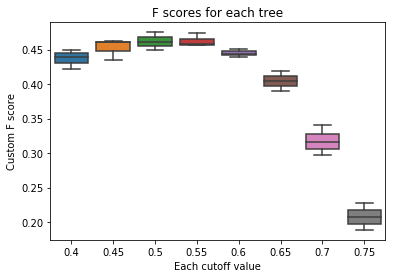

In [141]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_rdf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

Looks like the optimal cutoff is 0.50

In [142]:
cutoff_r = 0.50

### Upsampling: SMOTE

In [143]:
#scores_u = []
cutoffs_u = np.arange(0.45, 0.7, 0.05)

# for cutoff in cutoffs_u:
#     validated = cross_val_score(clf_s, X_sm, y_sm, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_u.append(validated)

In [144]:
# scores_u output
# [array([0.80553269, 0.94864211, 0.95104518]),
#  array([0.78202095, 0.96023965, 0.96544158]),
#  array([0.76506128, 0.97131826, 0.97446572]),
#  array([0.75039411, 0.97880056, 0.98204769]),
#  array([0.73613087, 0.9815415 , 0.98143687])]

In [145]:
scores_u_saved = [[0.80553269, 0.94864211, 0.95104518],
 [0.78202095, 0.96023965, 0.96544158],
 [0.76506128, 0.97131826, 0.97446572],
 [0.75039411, 0.97880056, 0.98204769],
 [0.73613087, 0.9815415 , 0.98143687]]

In [146]:
#Melt and make scores into dataframe
scores_udf = pd.DataFrame(scores_u_saved.copy())
#Rename columns
scores_udf['Cutoff'] = pd.DataFrame(cutoffs_u).round(2)
#Create cutoff column values
scores_udf = pd.melt(scores_udf, id_vars='Cutoff')
scores_udf.columns = ['Cutoff', 'CV', 'F Score'] 

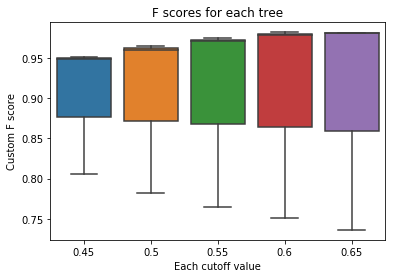

In [147]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_udf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [148]:
scores_udf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.45,0.901740
0.50,0.902567
0.55,0.903615
0.60,0.903747
0.65,0.899703


Looks like the optimal cutoff is 0.60

In [149]:
cutoff_u = 0.60

### Downsampling: TomekLinks

In [150]:
# scores_d = []
cutoffs_d = np.arange(0.4, 0.75, 0.05)

# for cutoff in cutoffs_d:
#     validated = cross_val_score(clf_t, X_tl, y_tl, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_d.append(validated)

In [151]:
# scores_d output
# [array([0.43390634, 0.46798324, 0.45026178]),
#  array([0.44848485, 0.47482993, 0.47028086]),
#  array([0.45927075, 0.48631744, 0.48048967]),
#  array([0.46778464, 0.46684832, 0.48070175]),
#  array([0.45556691, 0.43505808, 0.46843177]),
#  array([0.41277641, 0.38509317, 0.42316785]),
#  array([0.34383954, 0.29824561, 0.34188034])]

In [152]:
scores_d_saved = [[0.43390634, 0.46798324, 0.45026178],
 [0.44848485, 0.47482993, 0.47028086],
 [0.45927075, 0.48631744, 0.48048967],
 [0.46778464, 0.46684832, 0.48070175],
 [0.45556691, 0.43505808, 0.46843177],
 [0.41277641, 0.38509317, 0.42316785],
 [0.34383954, 0.29824561, 0.34188034]]

In [153]:
#Melt and make scores into dataframe
scores_ddf = pd.DataFrame(scores_d_saved.copy())
#Rename columns
scores_ddf['Cutoff'] = pd.DataFrame(cutoffs_d).round(2)
#Create cutoff column values
scores_ddf = pd.melt(scores_ddf, id_vars='Cutoff')
scores_ddf.columns = ['Cutoff', 'CV', 'F Score'] 

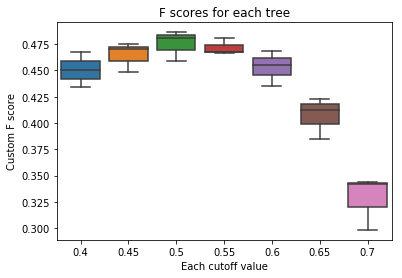

In [154]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_ddf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [155]:
scores_ddf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.40,0.450717
0.45,0.464532
0.50,0.475359
0.55,0.471778
0.60,0.453019
0.65,0.407012
0.70,0.327988


Looks like the optimal is 0.50

In [156]:
cutoff_d = 0.50

## Model Evaluation based on Optimal Probability Cutoff

### Regular Training

In [157]:
pred_rc = np.where(pd.DataFrame(prob_y_2_r)>cutoff_r, 1, 0).flatten()

In [158]:
cutoff_r

0.5

In [159]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_rc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2169,461,2630
1,129,262,391
All,2298,723,3021


In [160]:
rc_output = '{} \n Accuracy: {}'
rc = rc_output.format(classification_report(y_true, pred_rc, labels=[0,1]), accuracy_score(y_true, pred_rc))
print(rc)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2630
           1       0.36      0.67      0.47       391

   micro avg       0.80      0.80      0.80      3021
   macro avg       0.65      0.75      0.68      3021
weighted avg       0.87      0.80      0.83      3021
 
 Accuracy: 0.8047004303210857


In [161]:
#Compare with default cutoff 0.5
print(r)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2630
           1       0.36      0.67      0.47       391

   micro avg       0.80      0.80      0.80      3021
   macro avg       0.65      0.75      0.68      3021
weighted avg       0.87      0.80      0.83      3021
 
 Accuracy: 0.8047004303210857


### Upsampling: SMOTE 

In [162]:
pred_uc = np.where(pd.DataFrame(prob_y_2_s)>cutoff_u, 1, 0).flatten()

In [163]:
cutoff_u

0.6

In [164]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_uc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2588,42,2630
1,341,50,391
All,2929,92,3021


In [165]:
uc_output = '{} \n Accuracy: {}'
uc = uc_output.format(classification_report(y_true, pred_uc, labels=[0,1]), accuracy_score(y_true, pred_uc))
print(uc)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2630
           1       0.54      0.13      0.21       391

   micro avg       0.87      0.87      0.87      3021
   macro avg       0.71      0.56      0.57      3021
weighted avg       0.84      0.87      0.84      3021
 
 Accuracy: 0.8732207878186031


In [166]:
#Compare with default cutoff 0.5
print(u)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2630
           1       0.48      0.27      0.35       391

   micro avg       0.87      0.87      0.87      3021
   macro avg       0.69      0.61      0.64      3021
weighted avg       0.84      0.87      0.85      3021
 
 Accuracy: 0.8682555445216815


### Downsampling: TomekLinks

In [167]:
pred_dc = np.where(pd.DataFrame(prob_y_2_t)>cutoff_d, 1, 0).flatten()

In [168]:
cutoff_d

0.5

In [169]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_dc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2166,464,2630
1,133,258,391
All,2299,722,3021


In [170]:
dc_output = '{} \n Accuracy: {}'
dc = dc_output.format(classification_report(y_true, pred_dc, labels=[0,1]), accuracy_score(y_true, pred_dc))
print(dc)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2630
           1       0.36      0.66      0.46       391

   micro avg       0.80      0.80      0.80      3021
   macro avg       0.65      0.74      0.67      3021
weighted avg       0.87      0.80      0.83      3021
 
 Accuracy: 0.8023833167825224


In [171]:
print(d)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2630
           1       0.36      0.66      0.46       391

   micro avg       0.80      0.80      0.80      3021
   macro avg       0.65      0.74      0.67      3021
weighted avg       0.87      0.80      0.83      3021
 
 Accuracy: 0.8023833167825224


## XGBOOST

In [172]:
# A parameter grid for XGBoost
# params = {
#         'max_depth': [3, 4, 6],
#         'subsample': [1.0],
#         'colsample_bytree': [0.6, 1.0],
#         'scale_pos_weight': [8, 10, 12],
#         'learning_rate' : [0.1],
#         'n_estimators' : [200]
#         }

### Regular Training

#### GridSearch

In [173]:
#xg_class_r = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [174]:
#cv_xgr = GridSearchCV(estimator=xg_class_r, param_grid=params, scoring='f1', verbose=2, cv=3)

In [175]:
#cv_xgr.fit(X_train, y_train.values.ravel())

In [176]:
#cv_xgr.best_params_
# {'colsample_bytree': 1.0,
#  'learning_rate': 0.1,
#  'max_depth': 4,
#  'n_estimators': 200,
#  'scale_pos_weight': 8,
#  'subsample': 1.0}

In [177]:
#cv_xgr.best_score_
#0.46577333079332783

#### Best Parameter

In [178]:
#cv_xgr.best_estimator_

In [179]:
xg_clf_r = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [180]:
xg_clf_r.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [181]:
pred_xgr = xg_clf_r.predict(X_test)

#### Evaluation

In [182]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgr, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2173,457,2630
1,113,278,391
All,2286,735,3021


In [183]:
rxg_output = '{} \n Accuracy: {}'
rxg = rxg_output.format(classification_report(y_true, pred_xgr, labels=[0,1]), accuracy_score(y_true, pred_xgr))
print(rxg)

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      2630
           1       0.38      0.71      0.49       391

   micro avg       0.81      0.81      0.81      3021
   macro avg       0.66      0.77      0.69      3021
weighted avg       0.88      0.81      0.83      3021
 
 Accuracy: 0.8113207547169812


##### Compare with Random Forest

In [184]:
print(r)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2630
           1       0.36      0.67      0.47       391

   micro avg       0.80      0.80      0.80      3021
   macro avg       0.65      0.75      0.68      3021
weighted avg       0.87      0.80      0.83      3021
 
 Accuracy: 0.8047004303210857


#### Feature Importance for XGBoost 

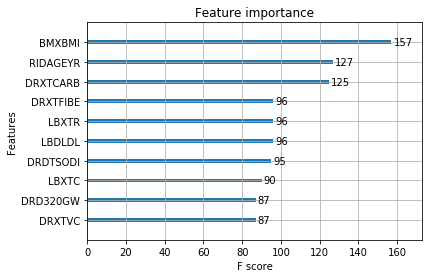

In [185]:
plot_importance(xg_clf_r, max_num_features = 10)

### Upsampling: SMOTE

#### GridSearch

In [186]:
#xg_class_u = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [187]:
#cv_xgu = GridSearchCV(estimator=xg_class_u, param_grid=params, scoring='f1', verbose=2, cv=3)

In [188]:
#cv_xgu.fit(X_sm, y_sm)

In [189]:
#cv_xgu.best_params_
# {'colsample_bytree': 0.6,
#  'learning_rate': 0.1,
#  'max_depth': 6,
#  'n_estimators': 200,
#  'scale_pos_weight': 8,
#  'subsample': 1.0}

In [190]:
#cv_xgu.best_score_
#0.8602420336517165

#### Best Parameter

In [191]:
#cv_xgu.best_estimator_

In [192]:
xg_clf_u = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [193]:
xg_clf_u.fit(X_sm, y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [194]:
pred_xgu = xg_clf_u.predict(X_test)

#### Evaluation

In [195]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgu, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2304,326,2630
1,166,225,391
All,2470,551,3021


In [196]:
uxg_output = '{} \n Accuracy: {}'
uxg = uxg_output.format(classification_report(y_true, pred_xgu, labels=[0,1]), accuracy_score(y_true, pred_xgu))
print(uxg)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2630
           1       0.41      0.58      0.48       391

   micro avg       0.84      0.84      0.84      3021
   macro avg       0.67      0.73      0.69      3021
weighted avg       0.86      0.84      0.85      3021
 
 Accuracy: 0.8371400198609732


##### Compare with Random Forest

In [197]:
print(u)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2630
           1       0.48      0.27      0.35       391

   micro avg       0.87      0.87      0.87      3021
   macro avg       0.69      0.61      0.64      3021
weighted avg       0.84      0.87      0.85      3021
 
 Accuracy: 0.8682555445216815


#### Feature Importance for XGBoost 

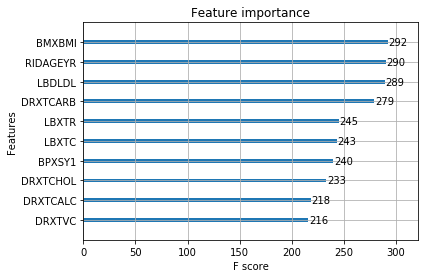

In [198]:
plot_importance(xg_clf_u, max_num_features = 10)

### Downsampling: TomekLinks

#### GridSearch

In [199]:
#xg_class_d = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [200]:
#cv_xgd = GridSearchCV(estimator=xg_class_d, param_grid=params, scoring='f1', verbose=2, cv=3)

In [201]:
#cv_xgd.fit(X_tl, y_tl)

In [202]:
#cv_xgd.best_params_
# {'colsample_bytree': 1.0,
#  'learning_rate': 0.1,
#  'max_depth': 4,
#  'n_estimators': 200,
#  'scale_pos_weight': 8,
#  'subsample': 1.0}

In [203]:
#cv_xgd.best_score_
#0.4728752502035096

#### Best Parameter

In [204]:
#cv_xgd.best_estimator_

In [205]:
xg_clf_d = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [206]:
xg_clf_d.fit(X_tl, y_tl)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [207]:
pred_xgd = xg_clf_d.predict(X_test)

#### Evaluation

In [208]:
#Creating a confusion matrix 
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgd, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,2157,473,2630
1,107,284,391
All,2264,757,3021


In [209]:
dxg_output = '{} \n Accuracy: {}'
dxg = dxg_output.format(classification_report(y_true, pred_xgd, labels=[0,1]), accuracy_score(y_true, pred_xgd))
print(dxg)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2630
           1       0.38      0.73      0.49       391

   micro avg       0.81      0.81      0.81      3021
   macro avg       0.66      0.77      0.69      3021
weighted avg       0.88      0.81      0.83      3021
 
 Accuracy: 0.8080105925190334


##### Compare with Random Forest

In [210]:
print(d)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2630
           1       0.36      0.66      0.46       391

   micro avg       0.80      0.80      0.80      3021
   macro avg       0.65      0.74      0.67      3021
weighted avg       0.87      0.80      0.83      3021
 
 Accuracy: 0.8023833167825224


#### Feature Importance for XGBoost 

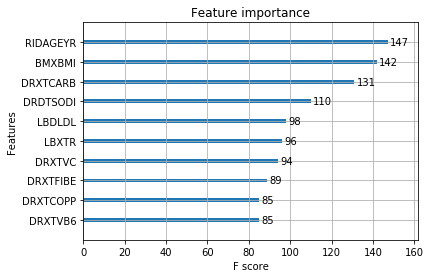

In [211]:
plot_importance(xg_clf_d, max_num_features = 10)

# Important Features: Risk Factors

### Feature Selection: Chi-Square

In [212]:
chi2_fi = featureScores.nlargest(10,'Score')
chi2_fi = chi2_fi.rename(columns={'Specs': 'Label', 'Score': 'Feature_Importance'})
chi2_fi

,Label,Feature_Importance
20,DRXTKCAL,61935.278431
23,DRXTPOTA,14539.333084
14,DRXTCALC,13188.539416
11,DRDTSODI,11696.630972
15,DRXTCARB,11673.641522
22,DRXTPHOS,11420.004591
50,RIDAGEYR,6904.187449
45,LBXTR,6743.751639
26,DRXTVARE,4831.146820
12,DRXTALCO,4325.718920


### Random Forest

#### Regular:

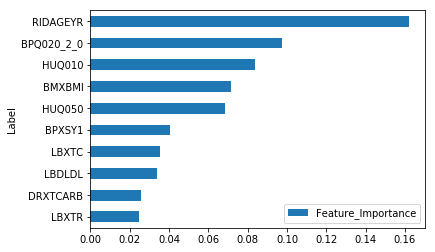

In [213]:
ax_r.figure

In [214]:
rfr_fi = rf_oo_r.copy()
rfr_fi

,Feature_Importance,Label
50,0.162156,RIDAGEYR
2,0.097376,BPQ020_2_0
34,0.083860,HUQ010
1,0.071307,BMXBMI
39,0.068305,HUQ050
5,0.040528,BPXSY1
44,0.035197,LBXTC
43,0.034115,LBDLDL
15,0.025838,DRXTCARB
45,0.024732,LBXTR


#### Upsample:

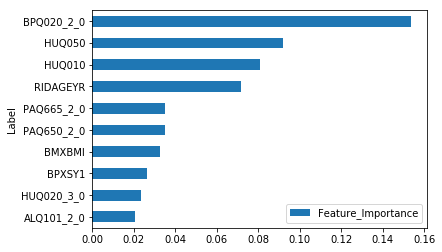

In [215]:
ax_u.figure

In [216]:
rfu_fi = rf_oo_u.copy()
rfu_fi

,Feature_Importance,Label
2,0.153759,BPQ020_2_0
39,0.092021,HUQ050
34,0.080852,HUQ010
50,0.071754,RIDAGEYR
48,0.035167,PAQ665_2_0
47,0.034993,PAQ650_2_0
1,0.032660,BMXBMI
5,0.026611,BPXSY1
36,0.023600,HUQ020_3_0
0,0.020682,ALQ101_2_0


#### Downsample:

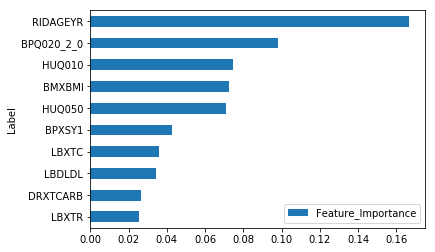

In [217]:
ax_d.figure

In [218]:
rfd_fi = rf_oo_d.copy()
rfd_fi

,Feature_Importance,Label
50,0.166749,RIDAGEYR
2,0.098189,BPQ020_2_0
34,0.074739,HUQ010
1,0.072498,BMXBMI
39,0.070932,HUQ050
5,0.042699,BPXSY1
44,0.035664,LBXTC
43,0.034596,LBDLDL
15,0.026745,DRXTCARB
45,0.025266,LBXTR


### XGBoost

#### Regular

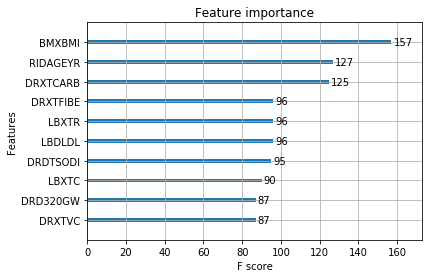

In [219]:
plot_importance(xg_clf_r, max_num_features = 10)

In [220]:
xgr_fs = xg_clf_r.get_booster().get_score(importance_type='weight')
xgr_fs = pd.DataFrame(xgr_fs.items(), columns = ['Label', 'Feature_Importance'])
xgr_fs = xgr_fs.nlargest(10, 'Feature_Importance')
xgr_fs

,Label,Feature_Importance
1,BMXBMI,157
0,RIDAGEYR,127
14,DRXTCARB,125
5,LBDLDL,96
11,LBXTR,96
24,DRXTFIBE,96
12,DRDTSODI,95
8,LBXTC,90
6,DRXTVC,87
18,DRD320GW,87


In [221]:
xgr_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_r.feature_importances_, 'Label':X_train.columns})
xgr_fi = xgr_fi.nlargest(10,'Feature_Importance')
xgr_fi

,Feature_Importance,Label
2,0.186945,BPQ020_2_0
50,0.101375,RIDAGEYR
34,0.059197,HUQ010
39,0.044275,HUQ050
1,0.026523,BMXBMI
52,0.026265,RIDRETH1_3_0
44,0.023657,LBXTC
37,0.022577,HUQ030_2_0
43,0.020857,LBDLDL
56,0.015123,SMD410_2_0


#### Upsample:

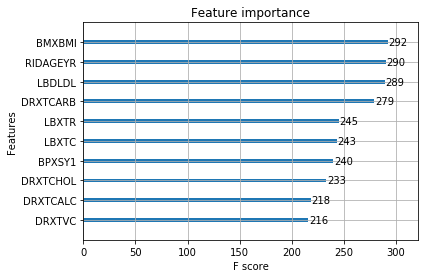

In [222]:
plot_importance(xg_clf_u, max_num_features = 10)

In [223]:
xgu_fs = xg_clf_u.get_booster().get_score(importance_type='weight')
xgu_fs = pd.DataFrame(xgu_fs.items(), columns = ['Label', 'Feature_Importance'])
xgu_fs = xgu_fs.nlargest(10, 'Feature_Importance')
xgu_fs

,Label,Feature_Importance
1,BMXBMI,292
0,RIDAGEYR,290
31,LBDLDL,289
19,DRXTCARB,279
28,LBXTR,245
6,LBXTC,243
41,BPXSY1,240
4,DRXTCHOL,233
44,DRXTCALC,218
37,DRXTVC,216


In [224]:
xgu_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_u.feature_importances_, 'Label':X_sm.columns})
xgu_fi = xgu_fi.nlargest(10,'Feature_Importance')
xgu_fi

,Feature_Importance,Label
2,0.222589,BPQ020_2_0
34,0.061232,HUQ010
39,0.057401,HUQ050
47,0.051077,PAQ650_2_0
37,0.048593,HUQ030_2_0
50,0.040187,RIDAGEYR
0,0.039188,ALQ101_2_0
36,0.034580,HUQ020_3_0
57,0.032174,SMQ680_2_0
49,0.032041,RIAGENDR_2_0


#### Downsample:

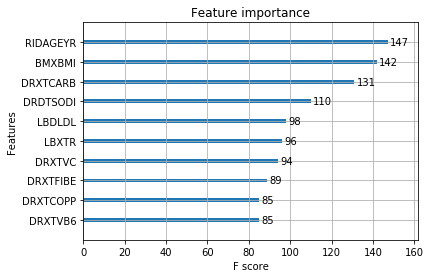

In [225]:
plot_importance(xg_clf_d, max_num_features = 10)

In [226]:
xgd_fs = xg_clf_d.get_booster().get_score(importance_type='weight')
xgd_fs = pd.DataFrame(xgd_fs.items(), columns = ['Label', 'Feature_Importance'])
xgd_fs = xgd_fs.nlargest(10, 'Feature_Importance')
xgd_fs

,Label,Feature_Importance
0,RIDAGEYR,147
1,BMXBMI,142
17,DRXTCARB,131
12,DRDTSODI,110
7,LBDLDL,98
11,LBXTR,96
9,DRXTVC,94
27,DRXTFIBE,89
23,DRXTVB6,85
25,DRXTCOPP,85


In [227]:
xgd_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_d.feature_importances_, 'Label':X_tl.columns})
xgd_fi = xgd_fi.nlargest(10,'Feature_Importance')
xgd_fi

,Feature_Importance,Label
2,0.182261,BPQ020_2_0
50,0.093239,RIDAGEYR
34,0.053676,HUQ010
39,0.048021,HUQ050
52,0.030474,RIDRETH1_3_0
1,0.030270,BMXBMI
44,0.023314,LBXTC
37,0.021998,HUQ030_2_0
43,0.021806,LBDLDL
46,0.017111,PAQ635_2_0


# Rankings:

Weights for each ranking:

In [228]:
wts = {'chi2_fi': 0.025, 'rf_fi': .15, 'xg_fs': .10, 'xg_fi': .075}

In [229]:
#Suffix names to join on
jl = ['chi2_fi', 'rfr_fi', 'rfu_fi', 'rfd_fi', 'xgr_fs', 'xgu_fs', 'xgd_fs', 'xgr_fi', 'xgu_fi', 'xgd_fi']

In [230]:
#Outer join function
def outerjoin_df(dfs_list):
    n = 1
    df_join = dfs_list[0]
    for d in dfs_list[1:]:
        df_join = df_join.merge(d, how='outer', suffixes=('_'+jl[n-1], '_'+jl[n]), on=['Label'])
        n = n+1
    return df_join

In [231]:
#List of top 10 feature importances
join_list = [chi2_fi, rfr_fi, rfu_fi, rfd_fi, xgr_fs, xgu_fs, xgd_fs, xgr_fi, xgu_fi, xgd_fi]

In [232]:
#Joined list of top 10 feature importances
joined = outerjoin_df(join_list)

In [233]:
joined.head()

,Label,Feature_Importance_chi2_fi,Feature_Importance_rfr_fi,Feature_Importance_rfu_fi,Feature_Importance_rfd_fi,Feature_Importance_xgr_fs,Feature_Importance_xgu_fs,Feature_Importance_xgd_fs,Feature_Importance_xgr_fi,Feature_Importance_xgu_fi,Feature_Importance_xgd_fi
0,DRXTKCAL,61935.278431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRXTPOTA,14539.333084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DRXTCALC,13188.539416,NaN,NaN,NaN,NaN,218.0,NaN,NaN,NaN,NaN
3,DRDTSODI,11696.630972,NaN,NaN,NaN,95.0,NaN,110.0,NaN,NaN,NaN
4,DRXTCARB,11673.641522,0.025838,NaN,0.026745,125.0,279.0,131.0,NaN,NaN,NaN


In [234]:
#Get the percentage importance of top ten for each feature importance
pct_list = pd.DataFrame()
pct_list['Label'] = joined['Label']
for i, j in enumerate(jl):
    pct_list[j] = joined['Feature_Importance_'+jl[i]]/joined['Feature_Importance_'+jl[i]].sum()   

In [235]:
#Fill in NaNs with 0
pct_list = pct_list.fillna(0)
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi
0,DRXTKCAL,0.420590,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,DRXTPOTA,0.098734,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,DRXTCALC,0.089561,0.000000,0.0,0.000000,0.000000,0.085658,0.000000,0.0,0.0,0.0
3,DRDTSODI,0.079429,0.000000,0.0,0.000000,0.089962,0.000000,0.102136,0.0,0.0,0.0
4,DRXTCARB,0.079273,0.040157,0.0,0.041268,0.118371,0.109627,0.121634,0.0,0.0,0.0


### Column for weighted overall risk factor importance ranking

In [236]:
#Weighted overall ranking
pct_list['Importance'] = pct_list[jl[0]] * wts['chi2_fi'] + pct_list[jl[1]] * wts['rf_fi'] + pct_list[jl[2]] * wts['rf_fi'] + pct_list[jl[3]] * wts['rf_fi'] + pct_list[jl[4]] * wts['xg_fs'] + pct_list[jl[5]] * wts['xg_fs'] + pct_list[jl[6]] * wts['xg_fs'] + pct_list[jl[7]] * wts['xg_fi'] + pct_list[jl[8]] * wts['xg_fi'] + pct_list[jl[9]] * wts['xg_fi']

In [237]:
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi,Importance
0,DRXTKCAL,0.420590,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.010515
1,DRXTPOTA,0.098734,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002468
2,DRXTCALC,0.089561,0.000000,0.0,0.000000,0.000000,0.085658,0.000000,0.0,0.0,0.0,0.010805
3,DRDTSODI,0.079429,0.000000,0.0,0.000000,0.089962,0.000000,0.102136,0.0,0.0,0.0,0.021196
4,DRXTCARB,0.079273,0.040157,0.0,0.041268,0.118371,0.109627,0.121634,0.0,0.0,0.0,0.049159


## Identified Top 10 Risk Factors:

In [238]:
Risk_Factors = pct_list[['Label','Importance']].copy()

In [241]:
Risk_Factors_10 = Risk_Factors.nlargest(10, 'Importance')
Risk_Factors_10

,Label,Importance
6,RIDAGEYR,0.166148
10,BPQ020_2_0,0.165503
12,BMXBMI,0.089617
11,HUQ010,0.081604
13,HUQ050,0.076624
16,LBDLDL,0.051608
4,DRXTCARB,0.049159
15,LBXTC,0.041248
7,LBXTR,0.040390
14,BPXSY1,0.035739


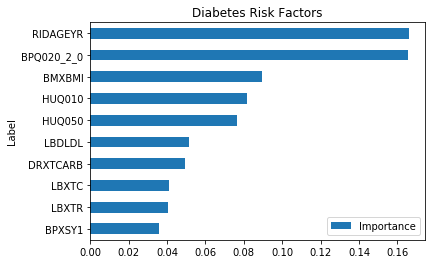

In [242]:
Risk_Factors_10 = Risk_Factors_10.sort_values(by=['Importance'])
Risk_Factors_Plot = Risk_Factors_10.plot.barh(y='Importance', x='Label', title='Diabetes Risk Factors')